## Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [30]:
#Reading the csv file and creating a dataframe
df = pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


By looking at the dataset and problem statement, I can say that AveragePrice is my target column.
Also, target column data is continuous(float type). So I can conclude that this project is a Regression problem.

## EDA

In [4]:
#Checking shape
df.shape

(18249, 14)

Our dataset has 18249 rows and 14 columns

In [5]:
#Checking missing values
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

I don't see any missing values in this dataset

In [31]:
#Dropping the first column Unnamed: 0 as it shows indexing 
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [32]:
#Checking all the column names and assigning it to variable col
col = df.columns
col

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

These are my feature/column names

### Dataset Description
   Input features:
- Date - The date of the observation
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold
- Total Bags      
- Small Bags      
- Large Bags      
- XLarge Bags 

----------------------------------------------------  
   Output feature:
- AveragePrice - the average price of a single avocado

In [15]:
#Checking for indexes of empty observation/space in all columns
for i in df.columns:
    space = df.loc[df[i] == " "]
    print(space)

Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []
Empty DataFrame
Columns: [Date, AveragePrice, Total Volume

I can see there are no empty observations in dataset

In [11]:
#Checking duplicates
sum(df.duplicated())

0

There are no duplicates

In [161]:
#Checking data type
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

I notice that Date, type, region are Object - Year is int type - and rest all features are float type values

Let's extract only the month in "Date" column (we already have a "year" column), rename it and create a new column for them, and than drop the "Date" column.

In [33]:
#converting object type of date to date type by using to_datetime()
df['Date']=pd.to_datetime(df['Date'])
#Extracting months in Month column
df['Month']=df['Date'].dt.month

In [34]:
# Checking if the values are correct
df["Month"].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [35]:
df["Month"].value_counts()

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64

I get correct values with 12 months.

<AxesSubplot:xlabel='Month', ylabel='count'>

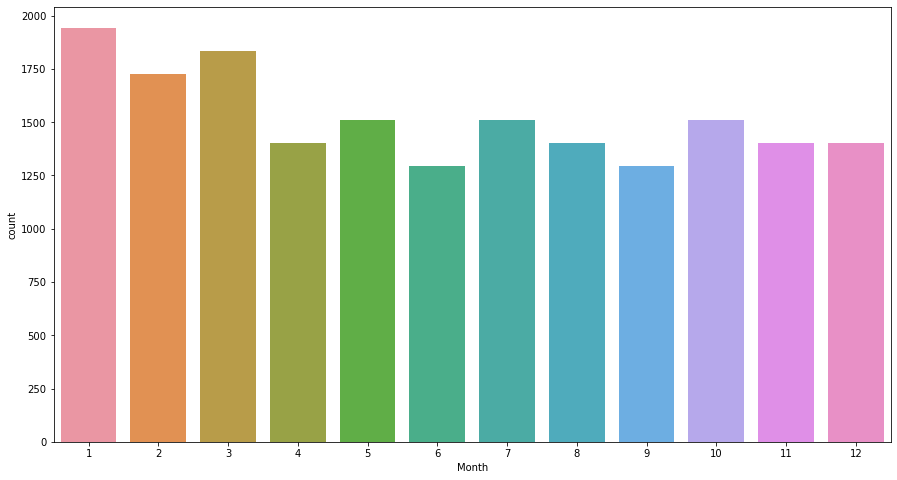

In [36]:
#months plot
plt.figure(figsize=(15,8))
sn.countplot("Month", data=df)

I can see sale decreasing by months

Jan, feb and March has seen maximum selling while June has seen the least

In [37]:
# Now I can drop the "Date" column 
df = df.drop(["Date"], axis = 1)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [20]:
#Making Dataframe for nominal(categorical) columns
df_nominal = df[[ 'Date','type','region']].copy()
df_nominal.columns

Index(['Date', 'type', 'region'], dtype='object')

### Univariate Analysis

In [17]:
#Checking unique values in each column
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

Above is the list of unique count in each column.
type & year has classes.

#### I'll be using countplot for type & year column as it will give frequency of the classes of columns.

<AxesSubplot:xlabel='year', ylabel='count'>

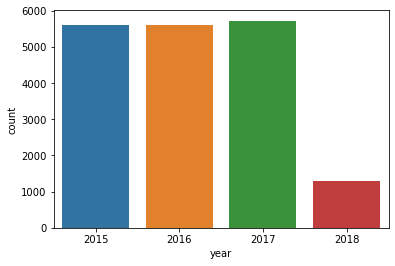

In [25]:
sn.countplot(df['year'])

There was less avocado consumed in 2018 as compared to previous years.

<AxesSubplot:xlabel='type', ylabel='count'>

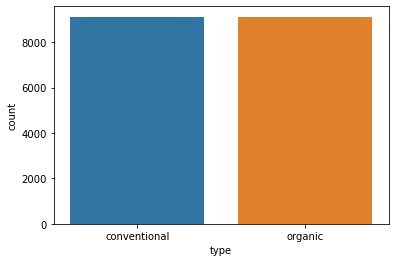

In [23]:
sn.countplot(df['type'])

There are aproximately equal value counts in type column

In [31]:
#Making Dataframe for continuous columns
df_continuous = df[[ 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 
                    'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' ]].copy()

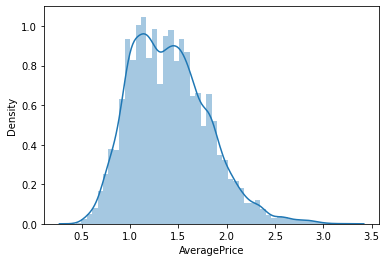

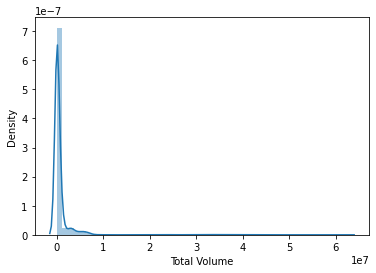

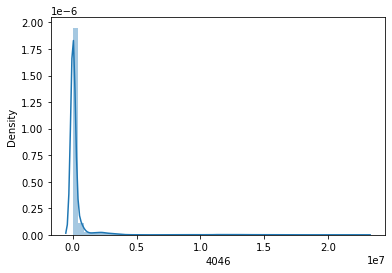

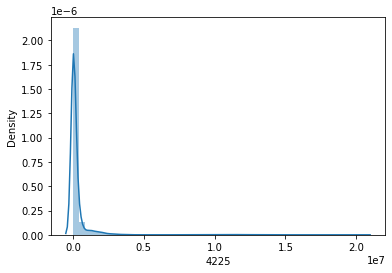

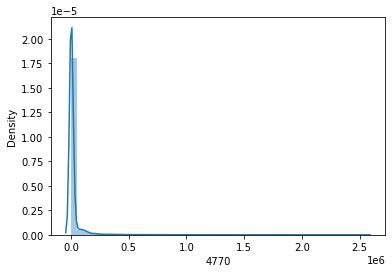

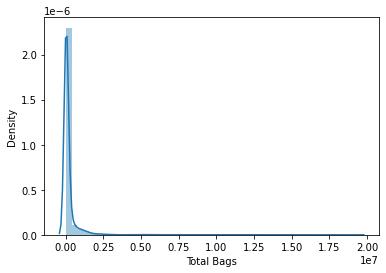

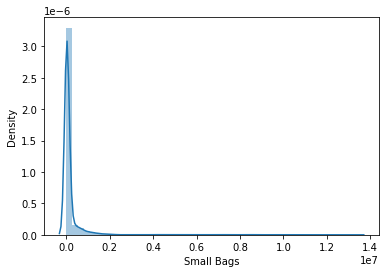

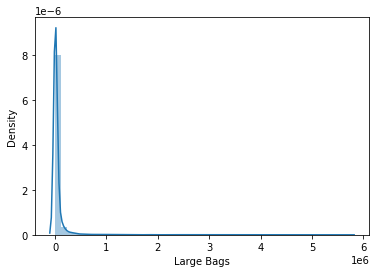

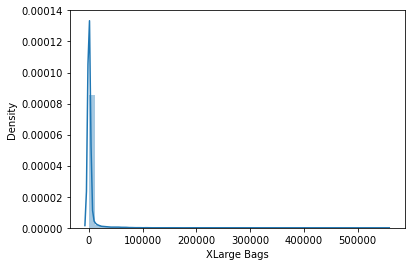

In [30]:
#plotting all the distplots for continuous columns
for i in df_continuous:
    plt.figure()
    sn.distplot(df[i])

I can see that 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' are highly skewed.

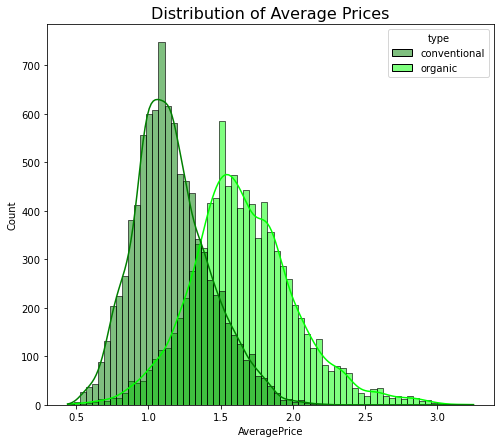

In [38]:
#Checking distribution of Average Prices
plt.figure(figsize = (8, 7))
sn.histplot(data = df, x = "AveragePrice", hue = "type", kde = True, palette = ["green", "lime"])
plt.title("Distribution of Average Prices", size = 16)
plt.show()

Price is greater for organic type and count is more for conventional type Avocados.

###  Bivariate Analysis

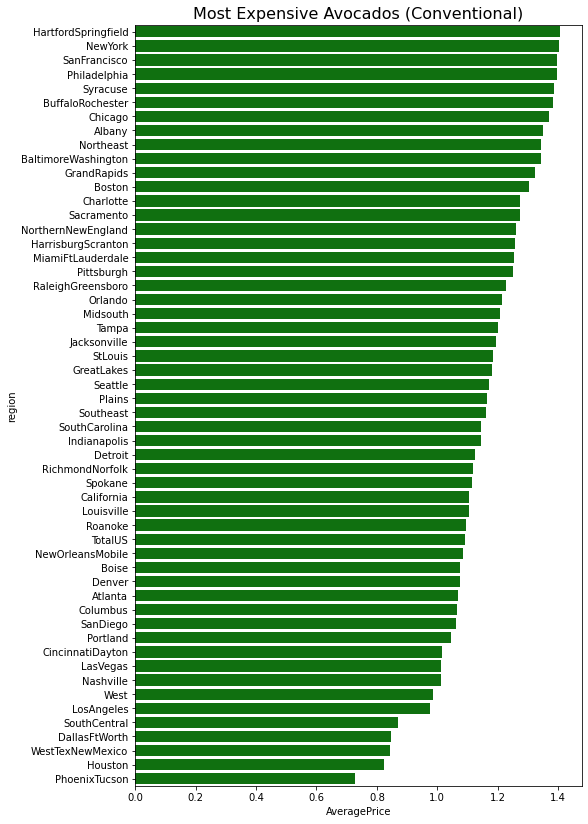

In [50]:
#Checking Most Expensive Avocados (Conventional)
df_conventional = df.loc[df["type"] == "conventional"].copy()
df_region = df_conventional.groupby(["region"])[["AveragePrice"]].mean().sort_values(by = "AveragePrice", ascending = False).copy()

plt.figure(figsize = (8, 14))
sn.barplot(data = df_region, x = "AveragePrice", y = df_region.index, color = "green")
plt.title("Most Expensive Avocados (Conventional)", size = 16)
plt.show()

Conventional Avocados are most expensive in HS, NY ,SF and so on.

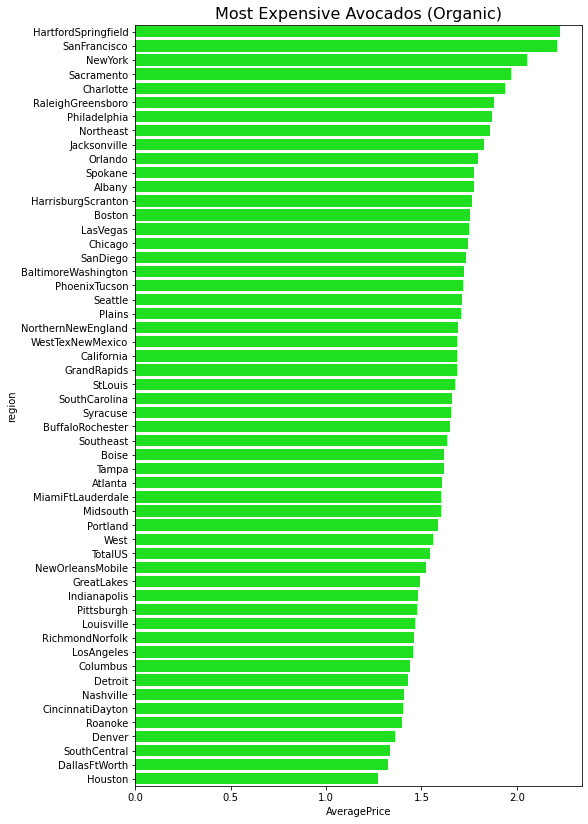

In [51]:
#Checking Most Expensive Avocados (Organic)
df_organic = df.loc[df["type"] == "organic"].copy()
df_region = df_organic.groupby(["region"])[["AveragePrice"]].mean().sort_values(by = "AveragePrice", ascending = False).copy()

plt.figure(figsize = (8, 14))
sn.barplot(data = df_region, x = "AveragePrice", y = df_region.index, color = "lime")
plt.title("Most Expensive Avocados (Organic)", size = 16)
plt.show()

Organic Avocados are most expensive in HS, SF, NY and so on.

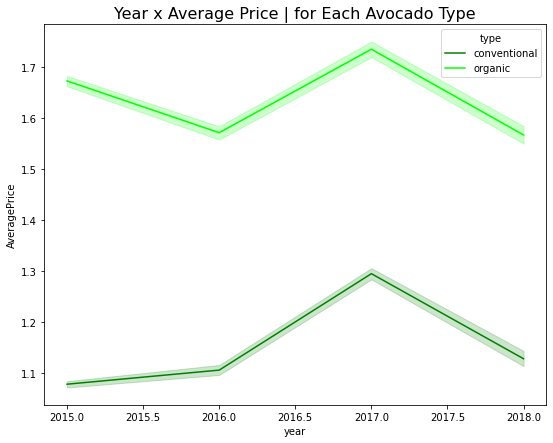

In [52]:
plt.figure(figsize = (9, 7))
sn.lineplot(data = df, x = "year", y = "AveragePrice", hue = "type", palette = ["green", "lime"])
plt.title("Year x Average Price | for Each Avocado Type", size = 16)
plt.show()

I can clearly see that average price of organic is more. Also, in year 2017, price of Avocados were highest. 

## Multi-variate Analysis

In [73]:
#describing the dataset
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


I got all correlations of features with other features. Let me visualize it using heat map.

<AxesSubplot:>

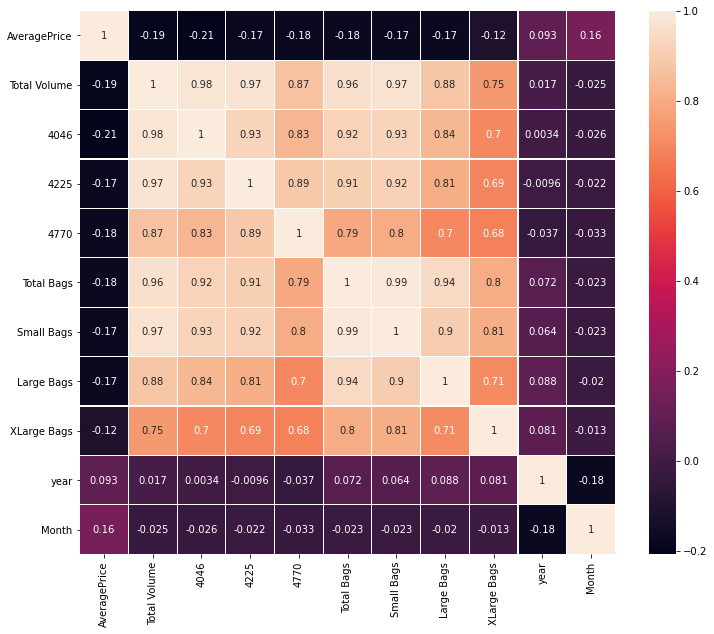

In [74]:
#Plotting heatmap with all features
plt.figure(figsize=(12,10))
sn.heatmap(df.corr(),linewidths=.1,annot=True, annot_kws={"size": 10})

From heatmap, I can observe that independent columns are highly correlated. Hence, I can drop accordingly.
Also, correlation is mostly negative with target column.

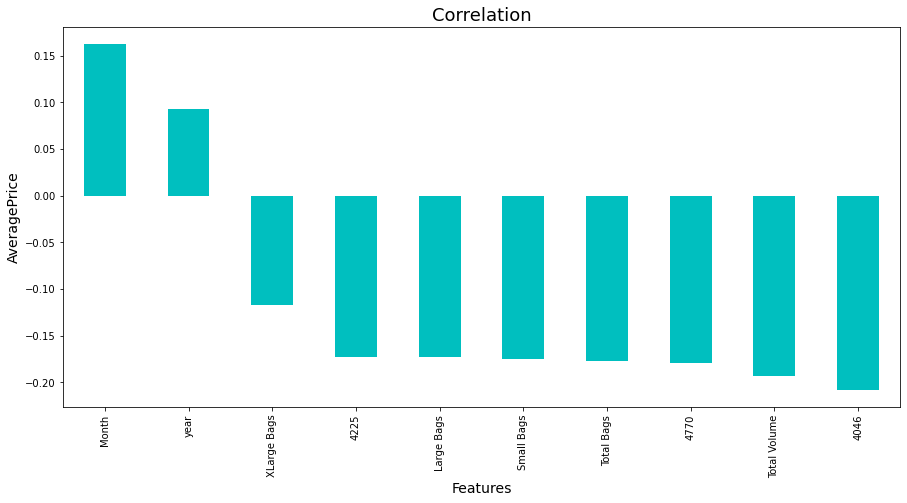

In [76]:
#Visualizing correlation of target variable using bar plot
plt.figure(figsize=(15,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('AveragePrice',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

From barplot, I can confirm that:

Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags are negatively correlated.

In [120]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int64
dtype: object

In [122]:
#let's encode the object columns
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [123]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [127]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0,1


I've successfully encoded onject type columns

## Identifying the outliers

AveragePrice       AxesSubplot(0.125,0.749828;0.227941x0.130172)
Total Volume    AxesSubplot(0.398529,0.749828;0.227941x0.130172)
4046            AxesSubplot(0.672059,0.749828;0.227941x0.130172)
4225               AxesSubplot(0.125,0.593621;0.227941x0.130172)
4770            AxesSubplot(0.398529,0.593621;0.227941x0.130172)
Total Bags      AxesSubplot(0.672059,0.593621;0.227941x0.130172)
Small Bags         AxesSubplot(0.125,0.437414;0.227941x0.130172)
Large Bags      AxesSubplot(0.398529,0.437414;0.227941x0.130172)
XLarge Bags     AxesSubplot(0.672059,0.437414;0.227941x0.130172)
type               AxesSubplot(0.125,0.281207;0.227941x0.130172)
year            AxesSubplot(0.398529,0.281207;0.227941x0.130172)
region          AxesSubplot(0.672059,0.281207;0.227941x0.130172)
Month                 AxesSubplot(0.125,0.125;0.227941x0.130172)
dtype: object

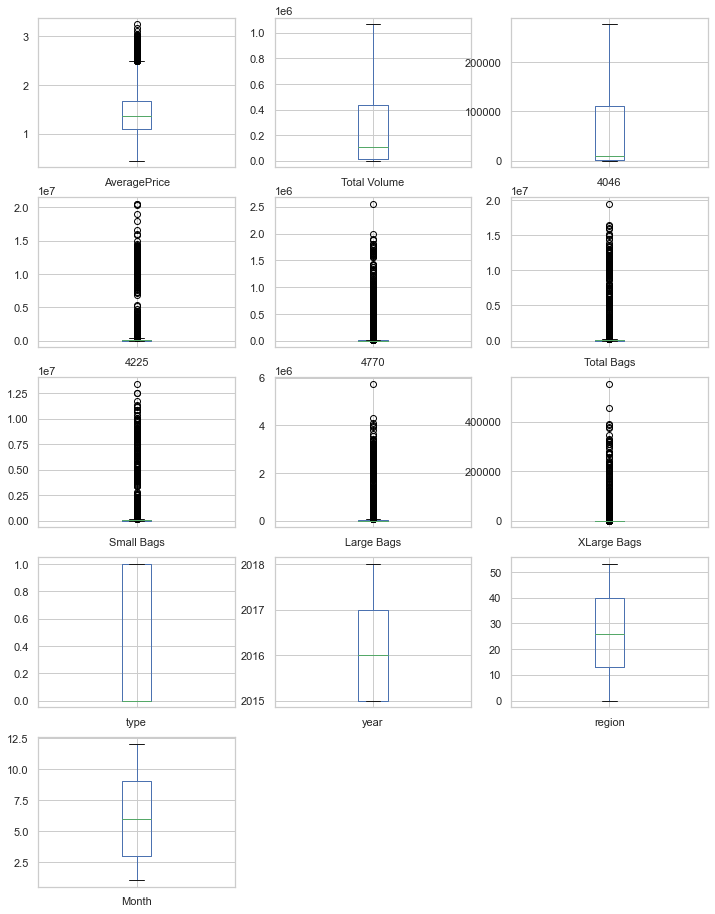

In [128]:
#checking for outliers using box plot
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,16))

<AxesSubplot:>

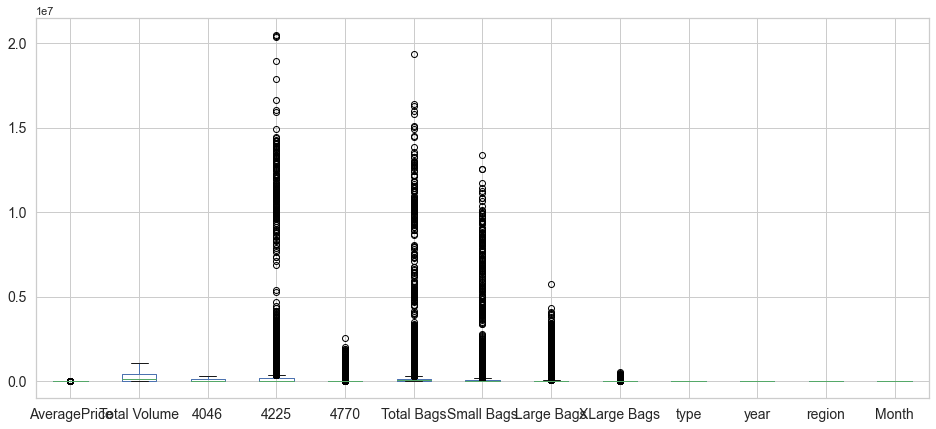

In [129]:
df.plot(kind='box',fontsize=14,figsize=(16,7))

I can see outliers in Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags 

## Data cleaning

### Removing outliers

In [130]:
#Making a variable as dfContCols and listing all columns with outliers.
dfContCols = df[[ 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [131]:
#Using zscore to remove the outliers
from scipy.stats import zscore
ZS = np.abs(zscore(dfContCols))
df1 = df[(ZS<3).all(axis=1)]
df1.shape

(17788, 13)

In [132]:
df.shape

(18249, 13)

I've succefully removed the outliers using zscore. 
Rows in my new dataset are 17788 whereas previously we had 18249 rows.

In [134]:
#Checking the data loss
((18249-17788)/18249)*100

2.5261658173050576

So I get data loss of just 2.52% hence I'll proceed with zscore.

In [135]:
df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0,1


### Checking skewness

In [136]:
df1.skew()

AveragePrice    0.560405
Total Volume    1.323482
4046            1.376727
4225            4.473070
4770            5.123016
Total Bags      4.072752
Small Bags      4.228631
Large Bags      5.068923
XLarge Bags     6.152911
type           -0.051517
year            0.220882
region          0.005545
Month           0.098592
dtype: float64

I can still see skewness in Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags

### Removing skewness using yeo-johnson method

In [137]:
#Creating list of column with skewness
skewCols=['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
skewCols

['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']

In [138]:
#Removing skewness using yeo-johnson
from sklearn.preprocessing import PowerTransformer
PT = PowerTransformer(method='yeo-johnson')
df1[skewCols] = PT.fit_transform(df1[skewCols].values)
df1.skew()

AveragePrice    0.560405
Total Volume   -0.074535
4046           -0.094187
4225           -0.043111
4770            0.027918
Total Bags     -0.021527
Small Bags     -0.024635
Large Bags     -0.110156
XLarge Bags     0.859633
type           -0.051517
year            0.220882
region          0.005545
Month           0.098592
dtype: float64

I can see skewness has been removed. Let me confirm it with distplot

<AxesSubplot:>

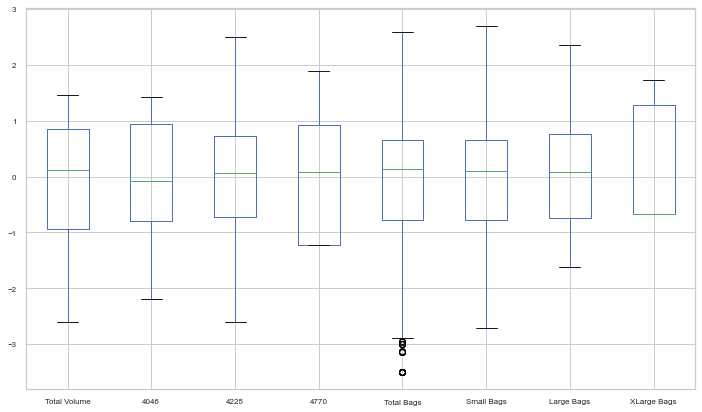

In [139]:
df1[skewCols].plot(kind='box',fontsize=8,figsize=(12,7))

In [140]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,-0.102513,-0.732860,0.357559,-0.213122,-0.527769,-0.337425,-0.775595,-0.676033,0.0,2015,0.0,12
1,1.35,-0.179799,-0.859967,0.275695,-0.165703,-0.488542,-0.301415,-0.765621,-0.676033,0.0,2015,0.0,12
2,0.93,0.206712,-0.811978,0.655052,0.033576,-0.556518,-0.364393,-0.752921,-0.676033,0.0,2015,0.0,12
3,1.08,0.000535,-0.706296,0.474806,-0.111577,-0.702638,-0.500635,-0.693414,-0.676033,0.0,2015,0.0,12
4,1.28,-0.215032,-0.761753,0.268312,-0.100893,-0.675988,-0.480220,-0.601178,-0.676033,0.0,2015,0.0,11


I can confirm that the skewness has been removed.

## Preprocessing

In [160]:
X = df1.drop("AveragePrice", axis=1)
y = df1["AveragePrice"]

In [161]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,-0.102513,-0.732860,0.357559,-0.213122,-0.527769,-0.337425,-0.775595,-0.676033,0.0,2015,0.0,12
1,-0.179799,-0.859967,0.275695,-0.165703,-0.488542,-0.301415,-0.765621,-0.676033,0.0,2015,0.0,12
2,0.206712,-0.811978,0.655052,0.033576,-0.556518,-0.364393,-0.752921,-0.676033,0.0,2015,0.0,12
3,0.000535,-0.706296,0.474806,-0.111577,-0.702638,-0.500635,-0.693414,-0.676033,0.0,2015,0.0,12
4,-0.215032,-0.761753,0.268312,-0.100893,-0.675988,-0.480220,-0.601178,-0.676033,0.0,2015,0.0,11


### SCALING

In [162]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score           #using r2_score as this is cont. data
from sklearn.model_selection import train_test_split

In [163]:
mms=MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(X), columns=X.columns)
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,0.615548,0.402815,0.580269,0.325414,0.487191,0.438297,0.213133,0.0,0.0,0.0,0.0,1.000000
1,0.596573,0.367675,0.564193,0.340661,0.493641,0.444956,0.215644,0.0,0.0,0.0,0.0,1.000000
2,0.691470,0.380942,0.638691,0.404738,0.482463,0.433310,0.218841,0.0,0.0,0.0,0.0,1.000000
3,0.640849,0.410159,0.603294,0.358065,0.458436,0.408115,0.233822,0.0,0.0,0.0,0.0,1.000000
4,0.587923,0.394827,0.562743,0.361500,0.462818,0.411890,0.257043,0.0,0.0,0.0,0.0,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...
17783,0.463485,0.461133,0.328919,0.000000,0.519475,0.469960,0.306090,0.0,1.0,1.0,1.0,0.090909
17784,0.441270,0.414479,0.379295,0.000000,0.491776,0.441147,0.287801,0.0,1.0,1.0,1.0,0.000000
17785,0.440335,0.414494,0.357946,0.540126,0.492783,0.444507,0.170338,0.0,1.0,1.0,1.0,0.000000
17786,0.457827,0.435624,0.370273,0.540026,0.504117,0.456192,0.179090,0.0,1.0,1.0,1.0,0.000000


I've succesfully scaled the dataset using minmaxscaler

### FIND BEST random_state 

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = GradientBoostingRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7572247208417612  on Random_state  3


Got best accuracy and random state.

In [176]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=maxRS)

I've created the train and test data where test data is 30% of my total data.

## FINDING BEST ALGORITHM

In [177]:
#importing the models and required libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#### Linear Regression

In [178]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print("Cross validation score: ", cross_val_score(lr,X,y,cv=5).mean()*100)

R2_score: 56.301297753982496
Cross validation score:  21.03713324715134


#### DecisionTreeRegressor

In [179]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print("Cross validation score: ", cross_val_score(DTR,X,y,cv=5).mean()*100)

R2_score: 75.72590269178404
Cross validation score:  -36.024991424821565


#### RandomForestRegressor

In [180]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print("Cross validation score: ", cross_val_score(RFR,X,y,cv=5).mean()*100)

R2_score: 88.89708297462498
Cross validation score:  18.915931844586503


#### SupportVectorRegressor

In [181]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print("Cross validation score: ", cross_val_score(svr,X,y,cv=5).mean()*100)

R2_score: 77.02596158999235
Cross validation score:  -5.386510362419519


#### GradientBoost Regressor

In [182]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred = GBR.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print("Cross validation score: ", cross_val_score(GBR,X,y,cv=5).mean()*100)

R2_score: 75.7224720841761
Cross validation score:  37.71004635621893


#### ElasticNet Regressor

In [199]:
el=ElasticNet(alpha=0.00001)
el.fit(x_train,y_train)
pred = el.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print("Cross validation score: ", cross_val_score(el,X,y,cv=5).mean()*100)

R2_score: 56.30643717676186
Cross validation score:  21.031750506168123


I got the R2_score & cross validation scores of all the algorithms
On checking the difference between r2_score & cross_val_score, I found that ElasticNet Regressor & GradientBoost Regressor are my 2 models with least difference. Hence, I will decide the best model after tuning these 2 models.

## HYPERPARAMETER TUNING

In [184]:
#importing required library
from sklearn.model_selection import GridSearchCV

In [185]:
#GradiantBoosting Tuning

#Creating GB Regression parameters dictionary
param_grid_xgb ={'n_estimators':[500,1000,2000],
                 'learning_rate':[.001,0.01,.1],
                 'max_depth':[1,2,4],
                 'subsample':[.5,.75,1],
                 'random_state':[1]}

In [186]:
#Create a GridSearchCV object and fit it to the training data
XGB_hp = GridSearchCV(GradientBoostingRegressor(),param_grid_xgb,refit=True)   #or cv=5
XGB_hp.fit(x_train,y_train)
XGB_hp.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 2000,
 'random_state': 1,
 'subsample': 1}

In [187]:
#Using the best parameters
XGB_final = GradientBoostingRegressor(learning_rate=0.1, max_depth=4, n_estimators=2000, random_state=1, subsample=1)
XGB_final.fit(x_train,y_train)
pred = XGB_final.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print("Cross validation score: ", cross_val_score(XGB_final,X,y,cv=5).mean()*100)

R2_score: 90.13173105253475
Cross validation score:  48.426715525927996


In [200]:
#ElasticNet Tuning

#Creating ElasticNet parameters dictionary
param_grid_en = {"max_iter": [1, 5, 10, 20, 30],
              "alpha": [0.00001, 0.0001, 0.001, 0.01, 1, 10],
              "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [201]:
#Create a GridSearchCV object and fit it to the training data
el_hp = GridSearchCV(ElasticNet(),param_grid_en,refit=True)   #or cv=5
el_hp.fit(x_train,y_train)
el_hp.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.9, 'max_iter': 30}

In [202]:
#Using the best parameters
en_final = ElasticNet(alpha = 1e-05, l1_ratio=0.9, max_iter=30)
en_final.fit(x_train,y_train)
pred = en_final.predict(x_test)
print('R2_score:',r2_score(y_test,pred)*100)
print("Cross validation score: ", cross_val_score(en_final,X,y,cv=5).mean()*100)

R2_score: 56.31697607011981
Cross validation score:  20.47518366592201


## I can clearly see that GradientBoostingRegressor is my best model after  tuning as it gives 90.13% accuracy.

## SERIALIZATON (Saving model)

In [209]:
#Saving the model as .pkl file
import joblib
joblib.dump(XGB_final,"avocado.pkl")

['avocado.pkl']

### Done :)